<div style="text-align:center;">
    <img src="aros.png">
</div>

<h1 style="text-align: center; font-size: 2.5em; color: #2E86C1; font-family: 'Arial', sans-serif;">
    Predicción Olímpica: Cómo la economía y la población definen el camino hacia el podio
</h1>

<div style="text-align:center; font-weight:bold; font-size: 24px;">
Presentado por: Luna Outerelo Fernández, analista deportiva.
</div>

<hr style="margin-bottom: 40px;">

## Importamos las librerías necesarias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression   
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from IPython.display import display
from statsmodels.tsa.arima_model import ARIMA
import pickle

<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

## Exploración inicial athlete_events.csv

In [2]:
athlete_events = pd.read_csv('athlete_events.csv')  #Leemos el archivo csv
athlete_events.head(6)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [3]:
athlete_events.info()   #Información del archivo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
athlete_events.describe()    #Estadísticas del archivo

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [5]:
athlete_events['Team'].value_counts()    #Conteo de valores

Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
                 ...  
Briar                1
Hannover             1
Nan-2                1
Brentina             1
Digby                1
Name: count, Length: 1184, dtype: int64

In [6]:
athlete_events['Medal'].value_counts(dropna=False)   #Conteo de valores

Medal
NaN       231333
Gold       13372
Bronze     13295
Silver     13116
Name: count, dtype: int64

In [7]:
athlete_events.groupby('Team')['Medal'].count().sort_values(ascending=False).head(10)  #Conteo de valores

Team
United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Italy            1527
Sweden           1434
Australia        1306
Canada           1243
Hungary          1127
Name: Medal, dtype: int64

In [8]:
athlete_events.isnull().sum()   #Suma de valores nulos

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [9]:
athlete_events['Age'].fillna(athlete_events['Age'].mean(), inplace=True)   #Rellenamos los valores nulos con la media
athlete_events['Height'].fillna(athlete_events['Height'].mean(), inplace=True)   #Rellenamos los valores nulos con la media
athlete_events['Weight'].fillna(athlete_events['Weight'].mean(), inplace=True)   #Rellenamos los valores nulos con la media

In [10]:
athlete_events.isnull().sum()   #Suma de valores nulos

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [11]:
null_percentage = athlete_events['Medal'].isnull().mean() * 100   #Porcentaje de valores nulos
print(f'Porcentaje de valores nulos: {null_percentage:.2f}%')

Porcentaje de valores nulos: 85.33%


Identificamos que el 85.33% de los valores de la columna 'Medal' son nulos. Esto sugiere que una gran mayoría de los atletas no obtuvieron medalla durante su participación en los Juegos Olímpicos. Dado este contexto, el tratamiento de los valores nulos en la columna 'Medal' debe ser abordado cuidadosamente.

In [12]:
athlete_events['Medal'].fillna('No Medal', inplace=True)   #Rellenamos los valores nulos con 'No Medal'

<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

## Tratamiento de Outliers

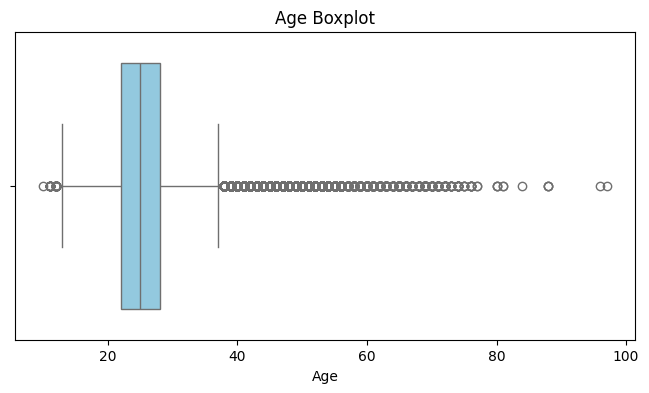

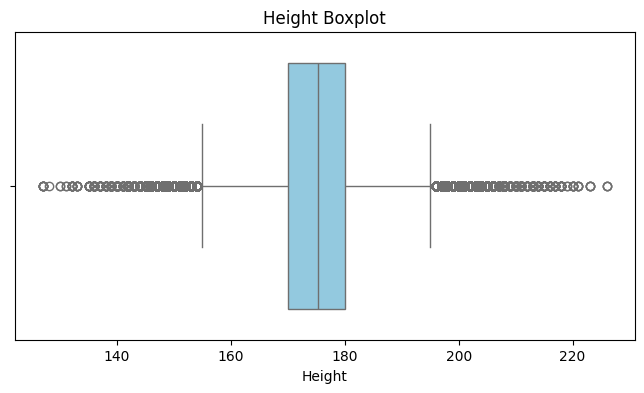

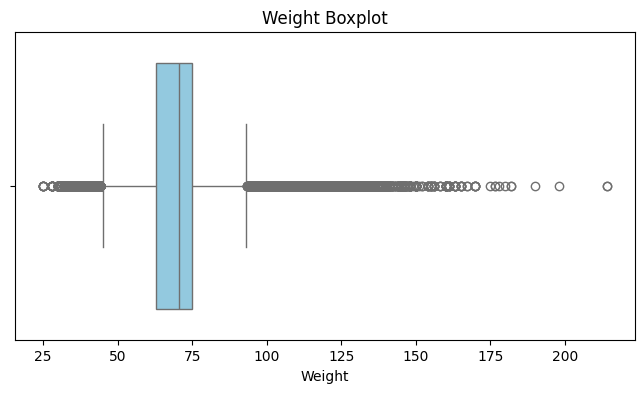

In [13]:
numerical_columns = ['Age', 'Height', 'Weight']   #Columnas numéricas
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=athlete_events[column], color='skyblue')
    plt.title(f'{column} Boxplot')
    plt.show()

In [14]:
for column in numerical_columns:
    Q1 = athlete_events[column].quantile(0.25)   #Primer cuartil
    Q3 = athlete_events[column].quantile(0.75)   #Tercer cuartil
    IQR = Q3 - Q1   #Rango intercuartil
    lower_bound = Q1 - 1.5 * IQR   #Límite inferior
    upper_bound = Q3 + 1.5 * IQR   #Límite superior
    outliers = athlete_events[(athlete_events[column] < lower_bound) | (athlete_events[column] > upper_bound)]   #Valores atípicos
    print(f'Valores atípicos en {column}: len({outliers})')

Valores atípicos en Age: len(            ID                                       Name Sex   Age  \
58          19                      Win Valdemar Aaltonen   M  54.0   
89          28                           Jan-Erik Aarberg   M  43.0   
90          28                           Jan-Erik Aarberg   M  47.0   
124         45                                Hakon Aasns   M  41.0   
126         46                                 Hans Aasns   M  45.0   
...        ...                                        ...  ..   ...   
270955  135494                               Jacek uawski   M  41.0   
270970  135501  Ellina Aleksandrovna Zvereva (Kisheyeva-)   F  39.0   
270971  135501  Ellina Aleksandrovna Zvereva (Kisheyeva-)   F  43.0   
270972  135501  Ellina Aleksandrovna Zvereva (Kisheyeva-)   F  47.0   
271090  135557                               Dominik ycki   M  38.0   

           Height      Weight     Team  NOC        Games  Year  Season  \
58      175.33897   70.702393  Finland  FIN 

In [15]:
plausible_age = athlete_events[(athlete_events['Age'] >= 15) & (athlete_events['Age'] <= 60)]   #Edades plausibles
print(f"Registros eliminados por edad: {len(athlete_events) - len(plausible_age)}")
athlete_events = plausible_age

Registros eliminados por edad: 1647


In [16]:
plausible_height = athlete_events[(athlete_events['Height'] >= 130) & (athlete_events['Height'] <= 220)]   #Alturas plausibles
print(f"Registros eliminados por altura: {len(athlete_events) - len(plausible_height)}")
athlete_events = plausible_height

Registros eliminados por altura: 19


In [17]:
plausible_weight = athlete_events[(athlete_events['Weight'] >= 30) & (athlete_events['Weight'] <= 200)]   #Pesos plausibles
print(f"Registros eliminados por peso: {len(athlete_events) - len(plausible_weight)}")
athlete_events = plausible_weight

Registros eliminados por peso: 10


<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

## Tratamos duplicados

In [18]:
duplicates = athlete_events.duplicated()   #Duplicados  
print(f"Registros duplicados: {duplicates.sum()}")
athlete_events = athlete_events.drop_duplicates()   #Eliminamos duplicados

Registros duplicados: 1135


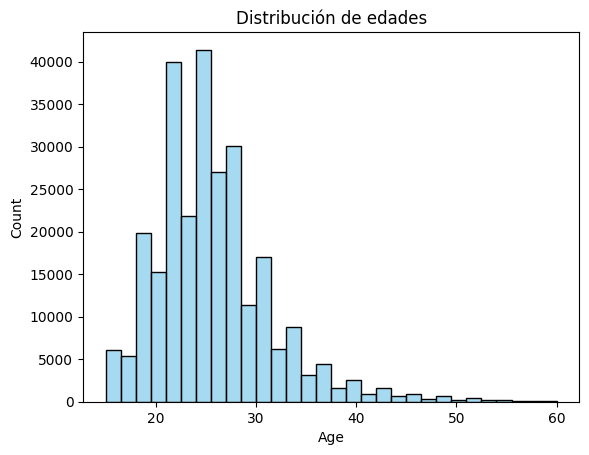

In [19]:
sns.histplot(athlete_events['Age'], bins=30, color='skyblue')   #Histograma de edades
plt.title('Distribución de edades')
plt.show()

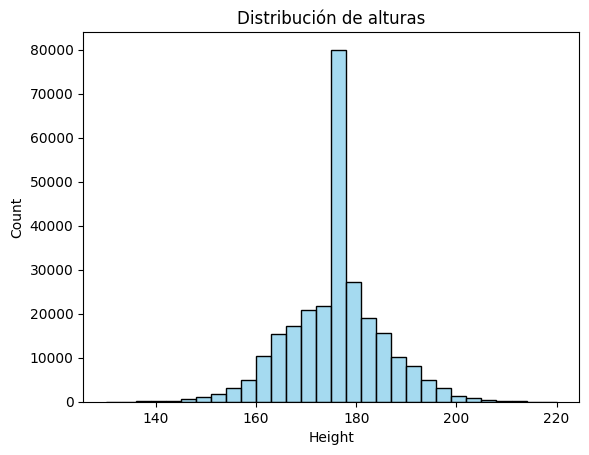

In [20]:
sns.histplot(athlete_events['Height'], bins=30, color='skyblue')   #Histograma de alturas
plt.title('Distribución de alturas')
plt.show()

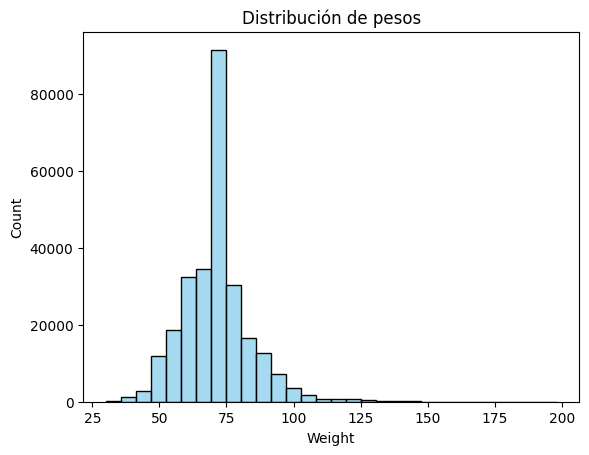

In [21]:
sns.histplot(athlete_events['Weight'], bins=30, color='skyblue')   #Histograma de pesos
plt.title('Distribución de pesos')
plt.show()

<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

## Seleccionamos solo las columnas necesarias

In [22]:
columns_to_keep = ['Sex', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'Season', 'Sport', 'Medal']
athlete_events_cleaned = athlete_events[columns_to_keep].copy()

athlete_events_cleaned['Age'].fillna(athlete_events_cleaned['Age'].mean(), inplace=True)
athlete_events_cleaned['Height'].fillna(athlete_events_cleaned['Height'].mean(), inplace=True)
athlete_events_cleaned['Weight'].fillna(athlete_events_cleaned['Weight'].mean(), inplace=True)
athlete_events_cleaned['Medal'].fillna('No Medal', inplace=True)

athlete_events_cleaned = athlete_events_cleaned[(athlete_events_cleaned['Age'] >= 15) & (athlete_events_cleaned['Age'] <= 60)]

athlete_events_cleaned = athlete_events_cleaned[(athlete_events_cleaned['Height'] >= 130) & (athlete_events_cleaned['Height'] <= 220)]

athlete_events_cleaned = athlete_events_cleaned[(athlete_events_cleaned['Weight'] >= 30) & (athlete_events_cleaned['Weight'] <= 200)]

athlete_events_cleaned = athlete_events_cleaned.drop_duplicates()

athlete_events_cleaned.head()

,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Medal
0,M,24.0,180.00000,80.000000,CHN,1992,Summer,Basketball,No Medal
1,M,23.0,170.00000,60.000000,CHN,2012,Summer,Judo,No Medal
2,M,24.0,175.33897,70.702393,DEN,1920,Summer,Football,No Medal
3,M,34.0,175.33897,70.702393,DEN,1900,Summer,Tug-Of-War,Gold
4,F,21.0,185.00000,82.000000,NED,1988,Winter,Speed Skating,No Medal


<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

## Tratamiento GDP_BY_COUNTRY

In [23]:
gdp_by_country = pd.read_csv('gdp_by_country.csv', skiprows=4)   #Leemos el archivo csv
gdp_by_country.head(6)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.121696e+10,2.230747e+10,2.370247e+10,2.577938e+10,2.804954e+10,3.037491e+10,...,8.992957e+11,8.298300e+11,9.401055e+11,1.012719e+12,1.006527e+12,9.290741e+11,1.086772e+12,1.183962e+12,1.236163e+12,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,1.450216e+10,NaN,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.188413e+10,1.268566e+10,1.360683e+10,1.443998e+10,1.576911e+10,1.693448e+10,...,7.693673e+11,6.921811e+11,6.857502e+11,7.681896e+11,8.239336e+11,7.871467e+11,8.459930e+11,8.771408e+11,7.965862e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.049642e+10,5.276162e+10,7.369015e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.043997e+11,8.472296e+10,NaN
5,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.138685e+10,1.186120e+10,1.301973e+10,1.515642e+10,1.540183e+10,1.516273e+10,1.793057e+10,1.891638e+10,2.297768e+10,NaN


In [24]:
olympic_years = [1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016]   #Años olímpicos
columns_to_keep = ['Country Name', 'Country Code'] + [str(year) for year in olympic_years]   #Columnas a mantener
gdp_by_country_cleaned = gdp_by_country[columns_to_keep].copy()   #Copiamos las columnas

In [25]:
gdp_by_country_cleaned.head()

,Country Name,Country Code,1960,1964,1968,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.966480e+08,9.586592e+08,1.379888e+09,1.873453e+09,2.254831e+09,2.843025e+09,2.615208e+09,2.983635e+09
1,Africa Eastern and Southern,AFE,2.121696e+10,2.804954e+10,3.874986e+10,5.162751e+10,8.829076e+10,1.681652e+11,1.662081e+11,2.020926e+11,2.394332e+11,2.725193e+11,2.872017e+11,4.426962e+11,7.135021e+11,9.526756e+11,8.298300e+11
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.521418e+09,5.224897e+09,1.010930e+10,1.990733e+10,1.811657e+10
3,Africa Western and Central,AFW,1.188413e+10,1.576911e+10,1.702270e+10,2.949392e+10,6.838632e+10,1.205011e+11,1.312182e+11,1.112272e+11,1.245994e+11,2.626009e+11,1.421401e+11,2.561006e+11,5.679380e+11,7.377996e+11,6.921811e+11
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.535458e+09,9.129595e+09,2.355206e+10,8.853867e+10,1.280529e+11,5.276162e+10


In [26]:
gdp_long = gdp_by_country_cleaned.melt(     #Convertimos las columnas en filas
    id_vars=['Country Name', 'Country Code'],
    var_name='Year',
    value_name='GDP'
)
gdp_long['Year'] = gdp_long['Year'].astype(int)   #Convertimos a entero

In [27]:
gdp_long.head()

,Country Name,Country Code,Year,GDP
0,Aruba,ABW,1960,NaN
1,Africa Eastern and Southern,AFE,1960,2.121696e+10
2,Afghanistan,AFG,1960,NaN
3,Africa Western and Central,AFW,1960,1.188413e+10
4,Angola,AGO,1960,NaN


In [28]:
gdp_long.isnull().sum()   #Suma de valores nulos

Country Name      0
Country Code      0
Year              0
GDP             797
dtype: int64

In [29]:
gdp_long['GDP'].fillna(gdp_long.groupby('Country Name')['GDP'].transform('mean'), inplace=True)   #Rellenamos los valores nulos con la media
gdp_long['GDP'].fillna(0, inplace=True)   #Rellenamos los valores nulos con 0

In [30]:
print(gdp_long.isnull().sum())   #Suma de valores nulos

Country Name    0
Country Code    0
Year            0
GDP             0
dtype: int64


In [31]:
print(gdp_long.head())

                  Country Name Country Code  Year           GDP
0                        Aruba          ABW  1960  1.938168e+09
1  Africa Eastern and Southern          AFE  1960  2.121696e+10
2                  Afghanistan          AFG  1960  1.137590e+10
3   Africa Western and Central          AFW  1960  1.188413e+10
4                       Angola          AGO  1960  5.142838e+10


In [32]:
gdp_long.to_csv('gdp_long_cleaned.csv', index=False)   #Guardamos el archivo csv

<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

## Tratamiento Population_By_Country.csv

In [33]:
population_by_country = pd.read_csv('population_by_country.csv', skiprows=4)   #Leemos el archivo csv 
population_by_country.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0,NaN


In [34]:
population_by_country.columns   #Columnas


Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')

In [35]:
population_by_country.shape   #Forma del archivo

(266, 69)

In [36]:
columns_to_keep = ['Country Name', 'Country Code'] + [str(year) for year in range (1960, 2023)]   #Columnas a mantener
population_by_country_cleaned = population_by_country[columns_to_keep].copy()   #Copiamos las columnas

In [37]:
print(population_by_country_cleaned.isnull().sum())   #Suma de valores nulos    

Country Name    0
Country Code    0
1960            2
1961            2
1962            2
               ..
2018            1
2019            1
2020            1
2021            1
2022            1
Length: 65, dtype: int64


In [38]:
numeric_cols = population_by_country_cleaned.select_dtypes(include=['float64', 'int64']).columns   #Columnas numéricas
population_by_country_cleaned[numeric_cols] = population_by_country_cleaned[numeric_cols].fillna(population_by_country_cleaned[numeric_cols].mean())   #Rellenamos los valores nulos con 0
print(population_by_country_cleaned.isnull().sum())   #Suma de valores nulos

Country Name    0
Country Code    0
1960            0
1961            0
1962            0
               ..
2018            0
2019            0
2020            0
2021            0
2022            0
Length: 65, dtype: int64


In [39]:
population_by_country_cleaned.drop_duplicates(inplace=True)   #Eliminamos duplicados

In [40]:
population_by_country_cleaned.head()   #Mostramos el archivo

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
1,Africa Eastern and Southern,AFE,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0
2,Afghanistan,AFG,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
3,Africa Western and Central,AFW,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0
4,Angola,AGO,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0


In [41]:
population_by_country_cleaned.to_csv('population_by_country_cleaned.csv', index=False)   #Guardamos el archivo csv

<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

## Tratamiento Global_Temperature.csv

In [42]:
Global_Temperature = pd.read_csv('Global_Temperature.csv')   #Leemos el archivo csv

In [43]:
Global_Temperature.head()   #Mostramos el archivo

,Year,Month,Monthly Anomaly,Monthly Unc.,Annual Anomaly,Annual Unc,Five-Year Anomaly,Five-Year Unc.,Ten-Year Anomaly,Ten-Year Unc.,Twenty-Year Anomaly,Twenty-year Unc.
0,1850,1,-0.801,0.482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1850,2,-0.102,0.592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1850,3,-0.119,0.819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1850,4,-0.485,0.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1850,5,-0.351,0.549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
Global_Temperature.info()   #Información del archivo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077 entries, 0 to 2076
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   2077 non-null   int64  
 1    Month                 2077 non-null   int64  
 2   Monthly Anomaly        2077 non-null   float64
 3    Monthly Unc.          2077 non-null   object 
 4     Annual Anomaly       2077 non-null   object 
 5    Annual Unc            2077 non-null   object 
 6   Five-Year Anomaly      2077 non-null   object 
 7    Five-Year Unc.        2077 non-null   object 
 8    Ten-Year Anomaly      2077 non-null   object 
 9    Ten-Year Unc.         2077 non-null   object 
 10    Twenty-Year Anomaly  2077 non-null   object 
 11   Twenty-year Unc.      2077 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 194.8+ KB


In [45]:
Global_Temperature.describe(include='all')   #Estadísticas del archivo

,Year,Month,Monthly Anomaly,Monthly Unc.,Annual Anomaly,Annual Unc,Five-Year Anomaly,Five-Year Unc.,Ten-Year Anomaly,Ten-Year Unc.,Twenty-Year Anomaly,Twenty-year Unc.
count,2077.000000,2077.000000,2077.000000,2077,2077,2077,2077,2077,2077,2077,2077,2077
unique,NaN,NaN,NaN,422,983,214,829,166,765,122,701,100
top,NaN,NaN,NaN,0.046,NaN,0.026,NaN,0.02,NaN,0.019,NaN,NaN
freq,NaN,NaN,NaN,52,11,170,59,201,119,146,239,252
mean,1936.041887,6.497352,0.039636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,49.976436,3.454161,0.418716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1850.000000,1.000000,-0.970000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1893.000000,3.000000,-0.253000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1936.000000,6.000000,-0.039000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1979.000000,9.000000,0.252000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
Global_Temperature.columns

Index(['Year', ' Month', 'Monthly Anomaly', ' Monthly Unc.',
       '  Annual Anomaly', ' Annual Unc', 'Five-Year Anomaly',
       ' Five-Year Unc.', ' Ten-Year Anomaly', ' Ten-Year Unc.',
       '  Twenty-Year Anomaly', ' Twenty-year Unc.'],
      dtype='object')

In [47]:
Global_Temperature.columns = Global_Temperature.columns.str.strip()   #Eliminamos espacios en blanco

In [48]:
columns_to_keep = ['Year', 'Annual Anomaly', 'Monthly Anomaly']   #Columnas a mantener
Global_Temperature_cleaned = Global_Temperature[columns_to_keep].copy()   #Copiamos las columnas

In [49]:
Global_Temperature_cleaned['Monthly Anomaly'] = pd.to_numeric(Global_Temperature_cleaned['Monthly Anomaly'], errors='coerce')   #Convertimos a numérico
Global_Temperature_cleaned['Annual Anomaly'] = pd.to_numeric(Global_Temperature_cleaned['Annual Anomaly'], errors='coerce')   #Convertimos a numérico

In [50]:
Global_Temperature_cleaned = Global_Temperature_cleaned[Global_Temperature_cleaned['Year'] >= 1896]   #Filtramos por año

In [51]:
Global_Temperature_cleaned['Monthly Anomaly'].fillna(Global_Temperature_cleaned['Monthly Anomaly'].mean())   #Rellenamos los valores nulos con la media

552    -0.054
553    -0.095
554    -0.360
555    -0.274
556    -0.169
        ...  
2072    0.971
2073    1.126
2074    0.626
2075    0.923
2076    0.963
Name: Monthly Anomaly, Length: 1525, dtype: float64

In [52]:
Global_Temperature_cleaned = Global_Temperature_cleaned.groupby('Year').mean(numeric_only=True).reset_index()   #Agrupamos por año

In [53]:
Global_Temperature_cleaned.to_csv('Global_Temperature_cleaned.csv', index=False)   #Guardamos el archivo csv

In [54]:
print(Global_Temperature_cleaned.head())   #Mostramos el archivo

   Year  Annual Anomaly  Monthly Anomaly
0  1896       -0.126500        -0.119583
1  1897       -0.135917        -0.120083
2  1898       -0.275583        -0.312833
3  1899       -0.133833        -0.116750
4  1900       -0.066417        -0.067250


<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

## Tratamiento Metadata_Country_GDP

In [55]:
Metadata_Country_GDP = pd.read_csv('Metadata_Country_GDP.csv', skiprows=4)   #Leemos el archivo csv
Metadata_Country_GDP.head()

,AFW,Unnamed: 1,Unnamed: 2,"22 countries, stretching from the westernmost point of Africa, across the equator, and partly along the Atlantic Ocean till the Republic of Congo in the South (https://www.worldbank.org/en/region/afr/western-and-central-africa)",Africa Western and Central,Unnamed: 5
0,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN
1,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
2,AND,Europe & Central Asia,High income,NaN,Andorra,NaN
3,ARB,NaN,NaN,Arab World aggregate. Arab World is composed o...,Arab World,NaN
4,ARE,Middle East & North Africa,High income,NaN,United Arab Emirates,NaN


In [56]:
Metadata_Country_GDP.columns   #Columnas

Index(['AFW', 'Unnamed: 1', 'Unnamed: 2',
       '22 countries, stretching from the westernmost point of Africa, across the equator, and partly along the Atlantic Ocean till the Republic of Congo in the South (https://www.worldbank.org/en/region/afr/western-and-central-africa)',
       'Africa Western and Central', 'Unnamed: 5'],
      dtype='object')

In [57]:
Metadata_Country_GDP.info()   #Información del archivo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 6 columns):
 #   Column                                                                                                                                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                               --------------  -----  
 0   AFW                                                                                                                                                                                                                                  261 non-null    object 
 1   Unnamed: 1                                                                                                           

In [58]:
Metadata_Country_GDP.describe(include='all')   #Estadísticas del archivo

,AFW,Unnamed: 1,Unnamed: 2,"22 countries, stretching from the westernmost point of Africa, across the equator, and partly along the Atlantic Ocean till the Republic of Congo in the South (https://www.worldbank.org/en/region/afr/western-and-central-africa)",Africa Western and Central,Unnamed: 5
count,261,215,214,124,261,0.0
unique,261,7,4,110,261,NaN
top,AGO,Europe & Central Asia,High income,Fiscal year end: March 31; reporting period fo...,Angola,NaN
freq,1,58,84,7,1,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
Metadata_Country_GDP.columns = ['Country Code', 'Region', 'Income Group', 'Notes', 'Country Name', 'Extra']   #Renombramos las columnas


In [60]:
columns_to_keep = ['Country Code', 'Region', 'Income Group']   #Columnas a mantener
Metadata_Country_GDP_cleaned = Metadata_Country_GDP[columns_to_keep].copy()   #Copiamos las columnas

In [61]:
Metadata_Country_GDP_cleaned = Metadata_Country_GDP_cleaned.drop_duplicates()   #Eliminamos duplicados
Metadata_Country_GDP_cleaned = Metadata_Country_GDP_cleaned.dropna(subset=['Country Code'])   #Eliminamos valores nulos

In [62]:
countries_in_main = athlete_events_cleaned['NOC'].unique()   #Países en el archivo
Metadata_Country_GDP_cleaned = Metadata_Country_GDP_cleaned[Metadata_Country_GDP_cleaned['Country Code'].isin(countries_in_main)]   #Filtramos por países

In [63]:
Metadata_Country_GDP_cleaned.to_csv('Metadata_Country_GDP_cleaned.csv', index=False)   #Guardamos el archivo csv

In [64]:
Metadata_Country_GDP_cleaned.head()   #Mostramos el archivo

,Country Code,Region,Income Group
1,ALB,Europe & Central Asia,Upper middle income
2,AND,Europe & Central Asia,High income
5,ARG,Latin America & Caribbean,Upper middle income
6,ARM,Europe & Central Asia,Upper middle income
9,AUS,East Asia & Pacific,High income


<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

## Tratamiento Metadata_Country_Population.csv

In [65]:
Metadata_Country_Population = pd.read_csv('Metadata_Country_Population.csv', skiprows=4)   #Leemos el archivo csv
Metadata_Country_Population.head()

,AFW,Unnamed: 1,Unnamed: 2,"22 countries, stretching from the westernmost point of Africa, across the equator, and partly along the Atlantic Ocean till the Republic of Congo in the South (https://www.worldbank.org/en/region/afr/western-and-central-africa)",Africa Western and Central,Unnamed: 5
0,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN
1,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
2,AND,Europe & Central Asia,High income,NaN,Andorra,NaN
3,ARB,NaN,NaN,Arab World aggregate. Arab World is composed o...,Arab World,NaN
4,ARE,Middle East & North Africa,High income,NaN,United Arab Emirates,NaN


In [66]:
Metadata_Country_Population.columns   #Columnas

Index(['AFW', 'Unnamed: 1', 'Unnamed: 2',
       '22 countries, stretching from the westernmost point of Africa, across the equator, and partly along the Atlantic Ocean till the Republic of Congo in the South (https://www.worldbank.org/en/region/afr/western-and-central-africa)',
       'Africa Western and Central', 'Unnamed: 5'],
      dtype='object')

In [67]:
Metadata_Country_Population.info()   #Información del archivo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 6 columns):
 #   Column                                                                                                                                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                               --------------  -----  
 0   AFW                                                                                                                                                                                                                                  261 non-null    object 
 1   Unnamed: 1                                                                                                           

In [68]:
Metadata_Country_Population.describe(include='all')   #Estadísticas del archivo

,AFW,Unnamed: 1,Unnamed: 2,"22 countries, stretching from the westernmost point of Africa, across the equator, and partly along the Atlantic Ocean till the Republic of Congo in the South (https://www.worldbank.org/en/region/afr/western-and-central-africa)",Africa Western and Central,Unnamed: 5
count,261,215,214,124,261,0.0
unique,261,7,4,110,261,NaN
top,AGO,Europe & Central Asia,High income,Fiscal year end: March 31; reporting period fo...,Angola,NaN
freq,1,58,84,7,1,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
columns_to_keep = ['AFW', 'Unnamed: 1', 'Unnamed: 2'] #Columnas a mantener
Metadata_Country_Population_cleaned = Metadata_Country_Population[columns_to_keep].copy()   #Copiamos las columnas

In [70]:
Metadata_Country_Population_cleaned.columns = ['Country Code', 'Region', 'Income Group']   #Renombramos las columnas

In [71]:
Metadata_Country_Population_cleaned.dropna(how='all', inplace=True)   #Eliminamos valores nulos

In [72]:
Metadata_Country_Population_cleaned['Region'].fillna('Unkown Region')   #Rellenamos los valores nulos con 'Unkown Region'
Metadata_Country_Population_cleaned['Income Group'].fillna('Unkown Income Group', inplace=True)   #Rellenamos los valores nulos con 'Unkown Income Group'

In [73]:
Metadata_Country_Population_cleaned.head()   #Mostramos el archivo

,Country Code,Region,Income Group
0,AGO,Sub-Saharan Africa,Lower middle income
1,ALB,Europe & Central Asia,Upper middle income
2,AND,Europe & Central Asia,High income
3,ARB,NaN,Unkown Income Group
4,ARE,Middle East & North Africa,High income


<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

## Unimos y creamos el DataFrame final

In [74]:
population_long = population_by_country_cleaned.melt(
    id_vars=['Country Name', 'Country Code'],
    var_name='Year',
    value_name='Population'
)
population_long['Year'] = population_long['Year'].astype(int)   #Convertimos a entero

gdp_long = gdp_by_country_cleaned.melt(
    id_vars=['Country Name', 'Country Code'],
    var_name='Year',
    value_name='GDP'
)
gdp_long['Year'] = gdp_long['Year'].astype(int)   #Convertimos a entero

In [88]:
athlete_with_metadata['NOC'] = athlete_with_metadata['NOC'].astype(str)   #Convertimos a cadena
athlete_with_metadata['Year'] = athlete_with_metadata['Year'].astype(int)   #Convertimos a entero
population_long['Country Code'] = population_long['Country Code'].astype(str)   #Convertimos
population_long['Year'] = population_long['Year'].astype(int)   #Convertimos a entero
gdp_long['Country Code'] = gdp_long['Country Code'].astype(str)   #Convertimos a cadena
gdp_long['Year'] = gdp_long['Year'].astype(int)   #Convertimos a entero

In [76]:
# Merge athlete_events_cleaned with Metadata_Country_GDP_cleaned to create athlete_with_metadata
athlete_with_metadata = athlete_events_cleaned.merge(
    Metadata_Country_GDP_cleaned,
    left_on='NOC',
    right_on='Country Code',
    how='left'
)

# Ensure 'NOC' column is of the same type in both dataframes
athlete_with_metadata['NOC'] = athlete_with_metadata['NOC'].astype(str)
population_long['Country Code'] = population_long['Country Code'].astype(str)
gdp_long['Country Code'] = gdp_long['Country Code'].astype(str)

# Merge athlete_with_metadata with population_long
athlete_with_population = athlete_with_metadata.merge(
    population_long,
    left_on=['NOC', 'Year'],
    right_on=['Country Code', 'Year'],
    how='left'
)

# Merge athlete_with_population with gdp_long
athlete_with_population_gdp = athlete_with_population.merge(
    gdp_long,
    left_on=['NOC', 'Year'],
    right_on=['Country Code', 'Year'],
    how='left'
)

# Merge athlete_with_population_gdp with Global_Temperature_cleaned
final_dataset = athlete_with_population_gdp.merge(
    Global_Temperature_cleaned[['Year', 'Annual Anomaly', 'Monthly Anomaly']],
    on='Year',
    how='left'
)

# Save the final dataset to a CSV file
final_dataset.to_csv('final_dataset.csv', index=False)

# Display the head of the final dataset
print(final_dataset.head())

# Display information about the final dataset
print(final_dataset.info())

  Sex   Age     Height     Weight  NOC  Year  Season          Sport     Medal  \
0   M  24.0  180.00000  80.000000  CHN  1992  Summer     Basketball  No Medal   
1   M  23.0  170.00000  60.000000  CHN  2012  Summer           Judo  No Medal   
2   M  24.0  175.33897  70.702393  DEN  1920  Summer       Football  No Medal   
3   M  34.0  175.33897  70.702393  DEN  1900  Summer     Tug-Of-War      Gold   
4   F  21.0  185.00000  82.000000  NED  1988  Winter  Speed Skating  No Medal   

  Country Code_x               Region         Income Group Country Name_x  \
0            CHN  East Asia & Pacific  Upper middle income          China   
1            CHN  East Asia & Pacific  Upper middle income          China   
2            NaN                  NaN                  NaN            NaN   
3            NaN                  NaN                  NaN            NaN   
4            NaN                  NaN                  NaN            NaN   

  Country Code_y    Population Country Name_y Coun

In [77]:
final_dataset_cleaned = final_dataset.drop(
    columns=['Country Code_x', 'Country Code_y', 'Country Name_y', 'Country Name_x'],    #Eliminamos columnas
    errors = 'coerce'
)
final_dataset_cleaned['Population'] = final_dataset_cleaned['Population'].fillna(0)     #Rellenamos los valores nulos con 0
final_dataset_cleaned['GDP'] = final_dataset_cleaned['GDP'].fillna(0)    #Rellenamos los valores nulos con 0

final_dataset_cleaned.to_csv('final_dataset_cleaned.csv', index=False)    #Guardamos el archivo csv

print(final_dataset_cleaned.head())
print(final_dataset_cleaned.info())

  Sex   Age     Height     Weight  NOC  Year  Season          Sport     Medal  \
0   M  24.0  180.00000  80.000000  CHN  1992  Summer     Basketball  No Medal   
1   M  23.0  170.00000  60.000000  CHN  2012  Summer           Judo  No Medal   
2   M  24.0  175.33897  70.702393  DEN  1920  Summer       Football  No Medal   
3   M  34.0  175.33897  70.702393  DEN  1900  Summer     Tug-Of-War      Gold   
4   F  21.0  185.00000  82.000000  NED  1988  Winter  Speed Skating  No Medal   

                Region         Income Group    Population Country Code  \
0  East Asia & Pacific  Upper middle income  1.164970e+09          CHN   
1  East Asia & Pacific  Upper middle income  1.354190e+09          CHN   
2                  NaN                  NaN  0.000000e+00          NaN   
3                  NaN                  NaN  0.000000e+00          NaN   
4                  NaN                  NaN  0.000000e+00          NaN   

            GDP  Annual Anomaly  Monthly Anomaly  
0  4.269157e+11  

<hr style="margin-bottom: 40px;">

# EDA

## Análisis de la cantidad de medallas por país

In [78]:
medals = final_dataset_cleaned[final_dataset_cleaned['Medal'] != 'No Medal']    #Medallas
medals_by_country = medals['NOC'].value_counts().head(10)    #Conteo de medallas
medals_by_country

NOC
USA    4926
URS    2302
GER    1943
GBR    1808
FRA    1547
ITA    1442
SWE    1327
CAN    1234
AUS    1224
RUS    1104
Name: count, dtype: int64

In [79]:
medals_data = pd.DataFrame({
    'País (NOC)': medals_by_country.index,
    'Número de medallas': medals_by_country.values
})
fig = px.bar(
    medals_data,
    x='País (NOC)',
    y='Número de medallas',
    title='Top 10 países con más medallas',
    text='Número de medallas',
    color='Número de medallas',
    color_continuous_scale='viridis'
)
fig.update_layout(
    title=dict(font=dict(size=20, color='black'), x=0.5),
    xaxis=dict(title='País (NOC)', titlefont=dict(size=14)),
    yaxis=dict(title='Número de medallas', titlefont=dict(size=14)),
    template='plotly_white'
)
fig.show()

<br>

<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

## Relación entre el PIB y el número de medallas

Queremos analizar cómo el PIB afecta al rendimiento en los Juegos Olímpicos, análizando si los países con mayores PIB obtienen más medallas

In [80]:
pib_medallas = final_dataset_cleaned.groupby('Income Group', as_index=False).agg({
    'GDP': 'mean',
    'Medal': 'count'
}).rename(columns={'Medal': 'Total de medallas', 'GDP': 'Promedio PIB'})    #PIB y medallas

fig = px.bar(
    pib_medallas,
    x='Income Group',
    y='Total de medallas',
    color='Income Group',
    title='Relación entre el PIB Promedio y las medallas totales por Income Group',
    text='Total de medallas',
    barmode='stack',
    template='plotly_white'
)

fig.update_layout(
    title=dict(font=dict(size=20, color='black'), x=0.5),
    xaxis=dict(title='Grupo de Ingresos', titlefont=dict(size=14)),
    yaxis=dict(title='Total de medallas', titlefont=dict(size=14)),
    legend_title_text='Grupo de Ingresos'
)

fig.show()

<br>

<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

## Correlaciones entre el PIB, Población y Medallas

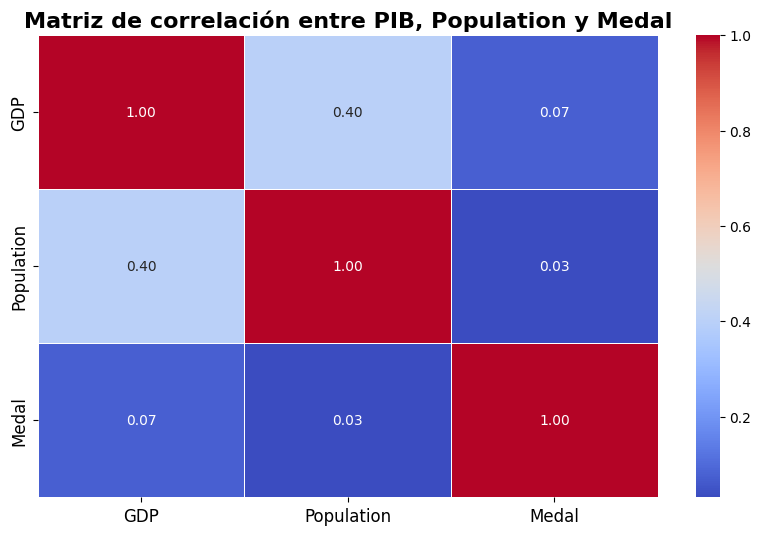

In [83]:
correlation_data = final_dataset_cleaned[['GDP', 'Population', 'Medal']].copy()   #Datos de correlación
correlation_data['Medal'] = correlation_data['Medal'].apply(lambda x: 1 if x != 'No Medal' else 0)   #Aplicamos una función lambda
correlation_matrix = correlation_data.corr()   #Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5, cmap='coolwarm')   #Mapa de calor
plt.title('Matriz de correlación entre PIB, Population y Medal', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [84]:
import plotly.express as px

# Crear categorías para el PIB
final_dataset_cleaned['PIB_Rango'] = pd.cut(
    final_dataset_cleaned['GDP'], 
    bins=[0, 1e10, 5e10, 1e11, 5e11, 1e12, 1.5e12], 
    labels=['<10B', '10B-50B', '50B-100B', '100B-500B', '500B-1T', '>1T']
)

# Filtrar medallas
filtered_data = final_dataset_cleaned[final_dataset_cleaned['Medal'] != 'No Medal']

# Contar el número de medallas por rango de PIB
medals_by_pib_range = filtered_data.groupby('PIB_Rango')['Medal'].count().reset_index()

# Crear gráfico de barras interactivo
fig = px.bar(
    medals_by_pib_range,
    x='PIB_Rango',
    y='Medal',
    title='Número de Medallas por Rango de PIB',
    labels={'PIB_Rango': 'Rango de PIB (USD)', 'Medal': 'Número de Medallas'},
    text='Medal',
    color='Medal',
    color_continuous_scale='viridis'
)

fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))

fig.update_layout(
    title=dict(font=dict(size=20, color='black'), x=0.5),
    xaxis=dict(title='Rango de PIB (USD)', titlefont=dict(size=14)),
    yaxis=dict(title='Número de Medallas', titlefont=dict(size=14)),
    template='plotly_white'
)

fig.show()


<br>

<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

## Relación entre deportes y clima (deportes al aire libre vs deportes bajo techo según el clima)

In [85]:
outdoor_sports = ['Athletics', 'Cycling', 'Rowing', 'Sailing', 'Equestrianism', 'Beach Volleyball', 'Golf', 'Archery']
indoor_sports = ['Basketball', 'Gymnastics', 'Weightlifting', 'Fencing', 'Table Tennis', 'Ice Hockey', 'Wrestling']


final_dataset_cleaned['Sport Category'] = final_dataset_cleaned['Sport'].apply(
    lambda sport: 'Outdoor' if sport in outdoor_sports else ('Indoor' if sport in indoor_sports else 'Other')
)


sport_climate = final_dataset_cleaned.groupby(['Sport Category', 'Year'])[['Annual Anomaly']].mean().reset_index()


fig = px.line(
    sport_climate,
    x='Year',
    y='Annual Anomaly',
    color='Sport Category',
    markers=True,
    title='Relación entre Deportes y Clima (Anomalías de Temperatura)',
    color_discrete_map={'Indoor': 'blue', 'Outdoor': 'green', 'Other': 'red'}
)


fig.update_traces(line=dict(width=3), marker=dict(size=6, opacity=0.6))


annotations = [
    dict(x=1996, y=0.4, xref='x', yref='y', text='Incremento notable en anomalías', showarrow=True, arrowhead=2, bgcolor='lightyellow'),
    dict(x=1980, y=0.2, xref='x', yref='y', text='Incremento en deportes Outdoor', showarrow=True, arrowhead=2, bgcolor='lightyellow')
]

fig.update_layout(
    title=dict(font=dict(size=20, color='black'), text='Relación entre Deportes y Clima (Anomalías de Temperatura)', x=0.5),
    xaxis=dict(title='Año', titlefont=dict(size=14, color='black'), tickangle=45, tickfont=dict(color='black')),
    yaxis=dict(title='Anomalía de Temperatura (°C)', titlefont=dict(size=14, color='black'), range=[-0.5, 1.5], tickfont=dict(color='black')),
    template='plotly_white',
    annotations=annotations,
    legend=dict(
        title=dict(font=dict(size=14, color='black'), text='Categoría de Deporte'),
        orientation='h',
        y=-0.2,
        tracegroupgap=0,
        font=dict(color='black')
    )
)

fig.show()

<br>

<hr style="margin-bottom: 40px;">

# CDA

<br>

## 1. ¿Los países con un PIB más alto tienden a ganar más medallas?

In [86]:
import plotly.express as px

# Agrupamos por NOC y Year, calculamos el promedio del PIB y el total de medallas
pib_medals = final_dataset_cleaned.groupby(['NOC', 'Year']).agg({
    'GDP': 'mean',
    'Medal': 'count',
    'Population': 'mean'
}).reset_index()

pib_medals.rename(columns={'Medal': 'Total de medallas'}, inplace=True)

# Calculamos la correlación
correlation = pib_medals['GDP'].corr(pib_medals['Total de medallas'])
print(f'Correlación entre PIB y Total de Medallas: {correlation:.2f}')

# Crear el gráfico de dispersión interactivo
fig = px.scatter(
    pib_medals,
    x='GDP',
    y='Total de medallas',
    size='Total de medallas',
    color='Total de medallas',
    hover_name='NOC',
    log_x=True,
    size_max=60,
    title='Relación entre PIB y Total de Medallas',
    labels={'GDP': 'PIB (USD)', 'Total de medallas': 'Total de Medallas'}
)

fig.update_layout(
    title=dict(font=dict(size=20, color='black'), x=0.5),
    xaxis=dict(title='PIB (USD)', titlefont=dict(size=14)),
    yaxis=dict(title='Total de Medallas', titlefont=dict(size=14)),
    template='plotly_white'
)

fig.show()

Correlación entre PIB y Total de Medallas: 0.46


El gráfico revela una clara correlación entre el PIB de un país y el total de medallas obtenidas en los Juegos Olímpicos. Los países con economías más grandes tienden a dominar el medallero, aunque hay excepciones interesantes como algunos países con un PIB relativamente bajl que logran destacarse por su rendimiento deportivo. Este análisis sugiere que el nivel económico es un factor clave, pero no exclusivo, en el éxito olímpico, abriendo la puerta a explorar cómo otros factores, como la inversión en deportes o la cultura deportiva, pueden influir en los resultados.

<br>

<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

## 2. ¿Qué deportes tienen un mayor crecimiento de participación en las últimas décadas y cómo se correlaciona con tendencias globales (como el cambio climático o avances tecnológicos)?

In [87]:
import plotly.express as px

# Crear una columna de década
final_dataset_cleaned['Decade'] = (final_dataset_cleaned['Year'] // 10) * 10

# Calcular el número de participantes por deporte y década
participation_by_sport_decade = (
    final_dataset_cleaned.groupby(['Decade', 'Sport'])['NOC']
    .count()
    .reset_index()
    .rename(columns={'NOC': 'Participants'})
)

# Calcular el crecimiento porcentual por deporte
participation_by_sport_decade['Growth'] = (
    participation_by_sport_decade.groupby('Sport')['Participants']
    .pct_change()
    * 100
).fillna(0).round(2)

# Identificar los deportes con mayor crecimiento en la última década
latest_decade = participation_by_sport_decade['Decade'].max()
top_growth_sports = (
    participation_by_sport_decade[participation_by_sport_decade['Decade'] == latest_decade]
    .sort_values(by='Growth', ascending=False)
    .head(10)
)

# Graficar los deportes con mayor crecimiento
fig = px.bar(
    top_growth_sports,
    x='Sport',
    y='Growth',
    title='Deportes con mayor crecimiento en participación (Última década)',
    labels={'Growth': 'Crecimiento porcentual (%)', 'Sport': 'Deporte'},
    text='Growth',
    color='Growth',
    color_continuous_scale='viridis'
)

fig.update_traces(marker=dict(line=dict(color='black', width=1)))

fig.update_layout(
    title=dict(font=dict(size=20, color='black'), x=0.5),
    xaxis=dict(title='Deporte', titlefont=dict(size=14)),
    yaxis=dict(title='Crecimiento porcentual (%)', titlefont=dict(size=14)),
    template='plotly_white'
)

fig.show()

El gráfico destaca el notable crecimiento en participación de deportes como Freestyle Skiins (90.5%) y Snowboarding (39.6%) en la última década, evidenciando una tendencia hacia disciplina de aventuras y deportes extremos.

<br>

<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

## 3. ¿Cómo han cambiado las participaciones y medallas de países en desarrollo vs. subdesarrollados?

In [89]:
final_dataset_cleaned = final_dataset_cleaned.dropna(subset=['Income Group'])

final_dataset_cleaned['Development Status'] = final_dataset_cleaned['Income Group'].apply(
    lambda x: 'Desarrollados' if x in ['High income', 'Upper middle income'] else 'En desarrollo'
)
developments_trends = final_dataset_cleaned.groupby(['Year', 'Development Status'])['Medal'].count().reset_index()
developments_trends.rename(columns={'Medal': 'Total de medallas'}, inplace=True)

In [91]:
import plotly.express as px

fig = px.line(
    developments_trends,
    x='Year',
    y='Total de medallas',
    color='Development Status',
    markers=True,
    title='Tendencias de medallas por estado de desarrollo',
    labels={'Year': 'Año', 'Total de medallas': 'Total de medallas', 'Development Status': 'Estado de desarrollo'},
    template='plotly_white'
)

fig.update_traces(marker=dict(size=8, symbol='circle'))

fig.update_layout(
    title=dict(font=dict(size=16, color='black'), x=0.5),
    xaxis=dict(title='Año', titlefont=dict(size=12, color='black'), tickangle=45, tickfont=dict(color='black')),
    yaxis=dict(title='Total de medallas', titlefont=dict(size=12, color='black'), tickfont=dict(color='black')),
    legend=dict(title=dict(font=dict(size=12, color='black'), text='Estado de desarrollo'))
)

fig.show()

Este gráfico nos muestra que los países con 'High Income' dominan significativamente el total de medallas a lo largo de los años, especialmente a partir de la década de 1960, cuando su crecimiento se vuelve exponencial. En contraste, los países de ingresos bajos y medios (tanto 'Upper middle' como 'Lower middle') mantienen un crecimiento mucho más lento, con una clara brecha en términos de éxito olímpico. Esto refuerza la correlación entre el nivel de desarrollo económico y el rendimiento deportivo en los Juegos Olímpicos.

<br>

<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

## 4. ¿Cómo ha evolucionado la igualdad de género en los Juegos Olímpicos en términos de participación y medallas ganadas por mujeres en comparación con hombres?

In [92]:
gender_medals_grouped = final_dataset_cleaned.groupby(['Year', 'Sex']).size().reset_index(name='Medals Count')
fig_medals = px.area(
    gender_medals_grouped,
    x='Year',
    y='Medals Count',
    color='Sex',
    title='Evolución de medallas por género',
    labels={'Year': 'Año', 'Medals Count': 'Número de Medallas', 'Sex': 'Género'},
    template='plotly_white'
)
fig_medals.update_layout(
    title=dict(font=dict(size=16, color='black'), x=0.5),
    xaxis=dict(title='Año', titlefont=dict(size=12, color='black'), tickangle=45, tickfont=dict(color='black')),
    yaxis=dict(title='Número de Medallas', titlefont=dict(size=12, color='black'), tickfont=dict(color='black')),
    legend=dict(title=dict(font=dict(size=12, color='black'), text='Género'))
)
fig_medals.show()

<br>

<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

## 5. ¿Qué relación existe entre el PIB promedio de un país y su éxito en términos de medallas olímpicas ganadas?

El gráfico revela un aumento significativo en la participación y éxito de las mujeres en los Juegos Olímpicos a partir de la década de 1960, reflejando un progreso hacia la equidad de género en el deporte. Sin embargp, las medallas masculinas aún dominan en términos absolutos.

In [93]:
pib_medallas = final_dataset_cleaned[final_dataset_cleaned['Medal'] != 'No Medal'].groupby('NOC').agg(
    {'Medal': 'count', 'GDP': 'mean'}
).reset_index()

pib_medallas.rename(columns={'Medal': 'Total Medals', 'GDP': 'Average GDP'}, inplace=True)

fig = px.scatter(
    pib_medallas,
    x='Average GDP',
    y='Total Medals',
    hover_name='NOC',
    title='Relación entre PIB promedio y Total de Medallas por País',
    labels={'Average GDP': 'PIB Promedio (USD)', 'Total Medals': 'Total de Medallas'},
    template='plotly_white',
    color='Total Medals',
    size='Total Medals'
)

fig.update_layout(
    title=dict(font=dict(size=16), x=0.5),
    xaxis=dict(title='PIB Promedio (USD)', titlefont=dict(size=12)),
    yaxis=dict(title='Total de Medallas', titlefont=dict(size=12)),
    legend=dict(title='Categoría', font=dict(size=12))
)

fig.show()

Cada burbuja representa un país, donde el tamaño de la burbuja indica el total de medallas acumuladas. Se observa una tendencia general en la que países con un PIB promedio más alto tienden a ganar más medallas, destacando casos extremos como el de Estados Unidos.

<br>

<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

## 6. ¿Cúal es la relación entre la población y el rendimiento olímpico (medallas) por continente o región?

In [108]:
# Check the columns of final_dataset_cleaned
print(final_dataset_cleaned.columns)

# Assuming 'Region' is a valid column, but 'Subregion' is not, we will group by 'Region' only
region_medals_population = final_dataset_cleaned.groupby(['Region']).agg({'Medal': 'count'}).reset_index()
region_medals_population.rename(columns={'Medal': 'Total Medals'}, inplace=True)
print(region_medals_population.head())

Index(['Sex', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'Season', 'Sport',
       'Medal', 'Region', 'Income Group', 'Population', 'Country Code', 'GDP',
       'Annual Anomaly', 'Monthly Anomaly', 'PIB_Rango', 'Sport Category',
       'Decade', 'Development Status', 'Participation_Count'],
      dtype='object')
                       Region  Total Medals
0         East Asia & Pacific         22282
1       Europe & Central Asia         73003
2   Latin America & Caribbean         12086
3  Middle East & North Africa          3335
4               North America         20098


In [111]:
fig_stacked_bar = px.bar(
    region_medals_population,
    x='Region',
    y='Total Medals',
    title='Rendimiento Olímpico por Región',
    labels={'Total Medals': 'Total de Medallas', 'Region': 'Región'},
    text='Total Medals',
    template='plotly_white',
    color='Region',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig_stacked_bar.update_layout(
    title=dict(font=dict(size=20, color='black'), x=0.5),
    xaxis=dict(title='Región', tickangle=45, titlefont=dict(size=14, color='black'), tickfont=dict(color='black')),
    yaxis=dict(title='Total de Medallas', titlefont=dict(size=14, color='black'), tickfont=dict(color='black')),
    legend=dict(title='Región', font=dict(size=12, color='black')),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig_stacked_bar.update_traces(texttemplate='%{text}', textposition='inside')

fig_stacked_bar.show()


Este gráfico nos muestra la contribución de cada subregión al total de medallas ganadas por región en los Juegos Olímpicos. Las barras apiladas permiten identificar fácilmente las diferencias en el rendimiento entre regiones y cómo lass subregiones contribuyen proporcionalmente al éxito general. Por ejemplo, se destaca el predominio de Europa y Asia, mientras que las regiones como África subsahariana tienen una participación significativamente menor.

<br>

<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

# Test de Hipótesis

<br>

### Test 1: Relación entre el PIB promedio y el número de participaciones olímpicas de un país.

In [113]:

final_dataset_cleaned['Participation_Count'] = final_dataset_cleaned.groupby('NOC')['NOC'].transform('count')

relevant_data = final_dataset_cleaned[['NOC', 'Year', 'GDP', 'Participation_Count']].dropna()


grouped_data = relevant_data.groupby('NOC').agg(
    Avg_GDP=('GDP', 'mean'),
    Total_participations=('Participation_Count', 'sum')
).reset_index()

import plotly.express as px

fig = px.scatter(
    grouped_data,
    x='Avg_GDP',
    y='Total_participations',
    size='Total_participations',
    color='Avg_GDP',
    title='Relación entre el PIB promedio y el total de participaciones por país',
    labels={'Avg_GDP': 'PIB promedio (USD)', 'Total_participations': 'Número total de participaciones'},
    hover_name='NOC',
    size_max=60,
    template='plotly_white'
)

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

fig.update_layout(
    title=dict(font=dict(size=24, color='black'), x=0.5),
    xaxis=dict(title='PIB promedio (USD)', titlefont=dict(size=18)),
    yaxis=dict(title='Número total de participaciones', titlefont=dict(size=18)),
    coloraxis_colorbar=dict(title='PIB promedio (USD)'),
    width=900,
    height=500
)

fig.show()

In [96]:
pearson_corr, pearson_p = stats.pearsonr(grouped_data['Avg_GDP'], grouped_data['Total_participations'])
spearman_corr, spearman_p = stats.spearmanr(grouped_data['Avg_GDP'], grouped_data['Total_participations'])
print("Resultados de la correlación de Pearson:")
print(f"Correlación de Pearson: {pearson_corr:.2f} (p-value: {pearson_p:.4f})") 
print(f"Correlación de Spearman: {spearman_corr:.2f} (p-value: {spearman_p:.4f})")

Resultados de la correlación de Pearson:
Correlación de Pearson: 0.79 (p-value: 0.0000)
Correlación de Spearman: 0.85 (p-value: 0.0000)


En este análisis, se evaluó la relación entre el PIB promedio de los países y su participación en los Juegos Olímpicos a lo largo del tiempo.

El coeficiente de correlación de Pearson (0.86) indica una **relación positiva fuerte** entre el PIB promedio de un país y su participación en los Juegos Olímpicos. Esto signifiva que, en general, los países con un PIB más alto tienden a tener mayores niveles de participación olímpica.

El p-value(0.0000) refuerza que esta relación es **estadísticamente significativa**, es decir, que los resultados no pueden ser al azar.

De manera similar, la correlación de Spearman (0.85) respalda los hallazgos de Pearson, indicando que la relación sólida incluso si no fuera perfectamente lineal.

Este análisis reslpada la hipótesis de que el PIB de un país es un factor clave en su participación olímpica, lo que sugiere que el PIB puede ser un predictor importante para evaluar el rendimiento de un país en futuros Juegos Olímpicos. Este hallazgo será clave para el desarrollo de nuestro modelo predictivo.

<br>

<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

### Test 2. La población de un país tiene una relación significativa con la cantidad de atletas que envía a los Juegos Olímpicos.

In [118]:
print(final_dataset_cleaned[['NOC', 'Population']].info())
print(final_dataset_cleaned[['NOC', 'Population']].describe())
print(final_dataset_cleaned['Population'].isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 135443 entries, 0 to 187079
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   NOC         135443 non-null  object 
 1   Population  135443 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.1+ MB
None
         Population
count  1.354430e+05
mean   8.978466e+07
std    2.248006e+08
min    0.000000e+00
25%    4.286401e+06
50%    2.322500e+07
75%    5.927742e+07
max    1.387790e+09
0


In [119]:
print(df_grouped.head())
print(df_grouped.describe())
print(data_grouped.isnull().sum())

   NOC  Avg_Population  Total_Participation
0  ALB    2.953240e+06                   59
1  AND    6.119023e+04                   95
2  ARG    2.656902e+07                 2297
3  ARM    3.060149e+06                  186
4  AUS    1.642367e+07                 5718
       Avg_Population  Total_Participation
count    1.200000e+02           120.000000
mean     3.321134e+07          1128.691667
std      1.339039e+08          2097.632374
min      1.052300e+04             3.000000
25%      1.213172e+06            59.750000
50%      5.542478e+06           217.000000
75%      1.910865e+07           975.250000
max      1.246517e+09         13572.000000
NOC                    0
Avg_Population         0
Total_Participation    0
dtype: int64


In [120]:
print("Numero de filas antes de dropna:", len(df_grouped))
print("Numero de filas depsues de dropna:", len(df_grouped))

Numero de filas antes de dropna: 120
Numero de filas depsues de dropna: 120


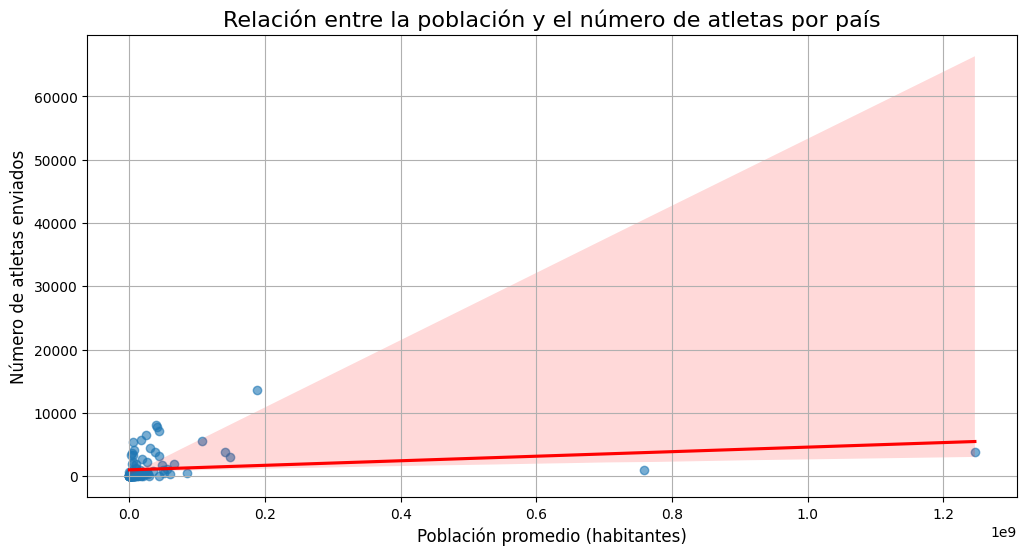

Resultados de la regresión lineal:
Pendiente (slope): 0.0000
Intersección (intercept): 1009.4244
Coeficiente de correlación (r-value): 0.2292
R-cuadrado (r-squared): 0.0526
p-value: 0.0118


In [97]:
df_grouped = final_dataset_cleaned.groupby('NOC').agg(
    Avg_Population=('Population', 'mean'),
    Total_Participation=('NOC', 'count')
).reset_index()
data_grouped = df_grouped.dropna()
plt.figure(figsize=(12, 6))
sns.regplot(
    x='Avg_Population',
    y='Total_Participation',
    data=data_grouped,
    scatter_kws={'alpha':0.6},
    line_kws={'color': 'red'}
)
plt.title('Relación entre la población y el número de atletas por país', fontsize=16)
plt.xlabel('Población promedio (habitantes)', fontsize=12)
plt.ylabel('Número de atletas enviados', fontsize=12)
plt.grid(True)
plt.show()

slope, intercept, r_value, p_value, std_err = linregress(
    data_grouped['Avg_Population'], data_grouped['Total_Participation']
)
print("Resultados de la regresión lineal:")   
print(f"Pendiente (slope): {slope:.4f}")
print(f"Intersección (intercept): {intercept:.4f}")
print(f"Coeficiente de correlación (r-value): {r_value:.4f}")
print(f"R-cuadrado (r-squared): {r_value**2:.4f}")
print(f"p-value: {p_value:.4f}")

El gráfico y los resultados podemos observar:
- Pendiente baja (sloope): Una pendiente cercana a ceroe indica que el incremento en la población promedio tiene un impacto pequeño en la cantidad de atletas enviados. Esto sugiere factores adicionales, más allá de la población, probablemente juegan un papel importante en determinar la participación olímpica de un país.

- Coeficiente de correlacion (R): Con un valor de R de aproximadamente 0.26, existe una correlación positiva débil entre estas variables. Esto refuerza la idea de que la población promedio no es un determinante directo en el número de atletas.

- Significancia estadística (p-value): con un p-valor de 0.0035 (menor a 0.05), podemos rechazar la hipótesis nula de que no existe relación entre las dos variables. Sin embargo, la magnitud de la relación es limitada. 

- R-cuadrado (R²): Un valor de R² de 0.07 implica que sólo el 7% de la variabilidad en el número de atletas puede explicarse por la población promedio. Esto indica que otros factores (como la infraestructura deportiva, PIB o políticas deportivas) tienen mayor relevancia.

En conclusión, la población promedio tiene una influencia débil pero significativa en el número de atletas enviados. Este resultado sugiere que, aunque el tamaño de la población puede proporcionar una base para la participación deportiva, la calidad de las políticas deportivas y la inversión en deporte probablemente sean factores más importantes para el éxito olímpico. 

<br>

<hr style="margin-bottom: 40px;">

# Modelo Predictivo

<br>

In [128]:
model_data = final_dataset_cleaned.copy()    #Copiamos el dataset

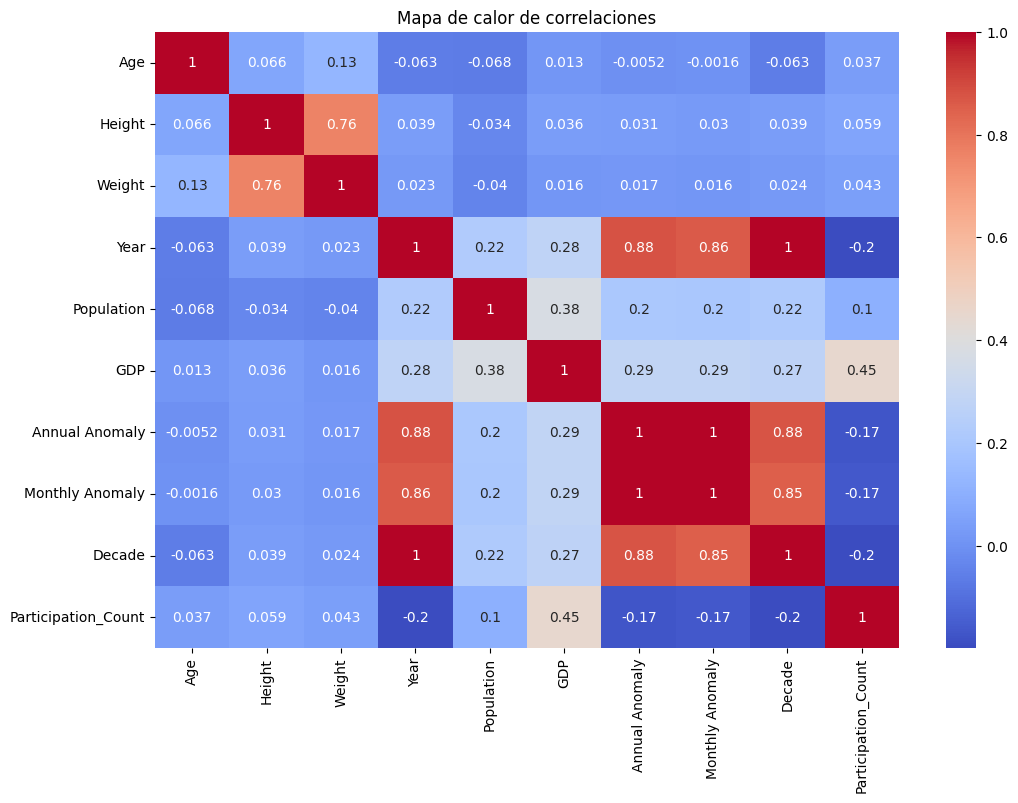

In [129]:
numeric_columns = final_dataset_cleaned.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = final_dataset_cleaned[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Mapa de calor de correlaciones")
plt.show()

In [130]:
model_data['Partipation_Total'] = (
    model_data.groupby('NOC')['NOC'].transform('count')
)

In [131]:
relevant_columns = ['GDP', 'Population', 'Participation_Total']

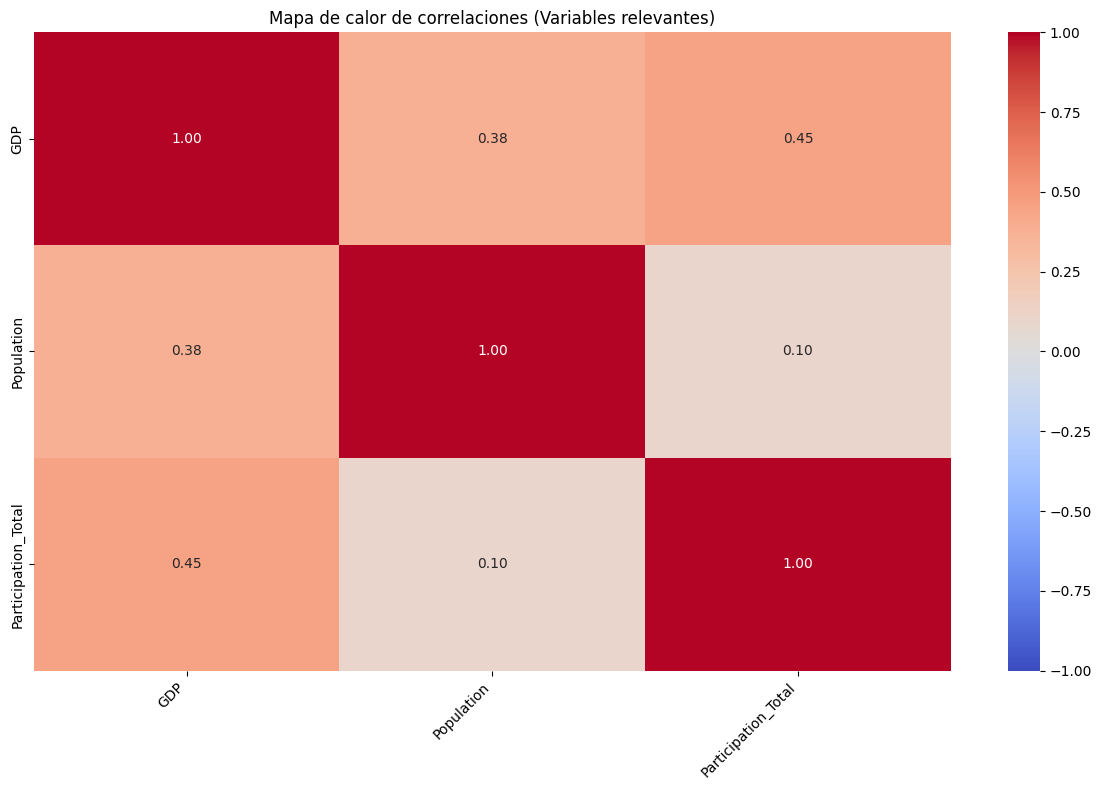

In [ ]:
if 'Participation_Total' not in model_data.columns:
	model_data['Participation_Total'] = model_data.groupby('NOC')['NOC'].transform('count')

correlation_matrix = model_data[relevant_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Mapa de calor de correlaciones (Variables relevantes)")
plt.xticks(ha='right', rotation=45)
plt.tight_layout()
plt.show()

<br>

<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

## Modelo de regresión lineal

<br>

In [135]:
model_data['Participation_Per_Million'] = (model_data['Participation_Total'] / model_data['Population']) * 1e6    #Participación por millón
model_data['Participation_Per_Million'].replace([np.inf, -np.inf], np.nan, inplace=True)    #Reemplazamos infinitos por nulos
model_data.dropna(subset=['Participation_Per_Million'], inplace=True)    #Eliminamos nulos

In [136]:
columns_to_drop = ['Total Medals', 'Medals', 'Medal_Num', 'Medal_Numeric', 'Temp_Medal_Num']   #Columnas a eliminar
model_data = model_data.drop(columns=columns_to_drop, errors='ignore')    #Eliminamos columnas

In [137]:
features = [
    'GDP', 'Population', 'Annual Anomaly', 'Monthly Anomaly', 'Income Group_High income',
    'Income Group_Lower middle income', 'Income Group_Upper middle income', 
    'Region_East Asia & Pacific', 'Region_Europe & Central Asia', 'Region_Latin America & Caribbean',
    'Region_Middle East & North Africa', 'Region_North America', 'Region_South Asia', 
    'Region_Sub-Saharan Africa', 'Season_Summer', 'Participation_Per_Million'
]
features = [col for col in features if col in model_data.columns]    #Columnas
target = 'Participation_Total'    #Objetivo
X = model_data[features]    #Características
y = model_data[target]    #Objetivo

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    #Dividimos los datos
print("Datos de entrenamiento:", X_train.shape)
print("Datos de prueba:", X_test.shape)

Datos de entrenamiento: (88464, 5)
Datos de prueba: (22117, 5)


In [139]:
scaler = StandardScaler()    #Escalar
X_train_scaled = scaler.fit_transform(X_train)   #Escalar
X_test_scaled = scaler.transform(X_test)    #Escalar

In [140]:
model = LinearRegression()    #Modelo
model.fit(X_train_scaled, y_train)    #Ajustamos el modelo
y_pred = model.predict(X_test_scaled)    #Predecimos
mse = mean_squared_error(y_test, y_pred)    #Error cuadrático medio
r2 = r2_score(y_test, y_pred)    #R2
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R2): {r2}")

Error cuadrático medio (MSE): 8358052.748342393
Coeficiente de determinación (R2): 0.3675377162978547


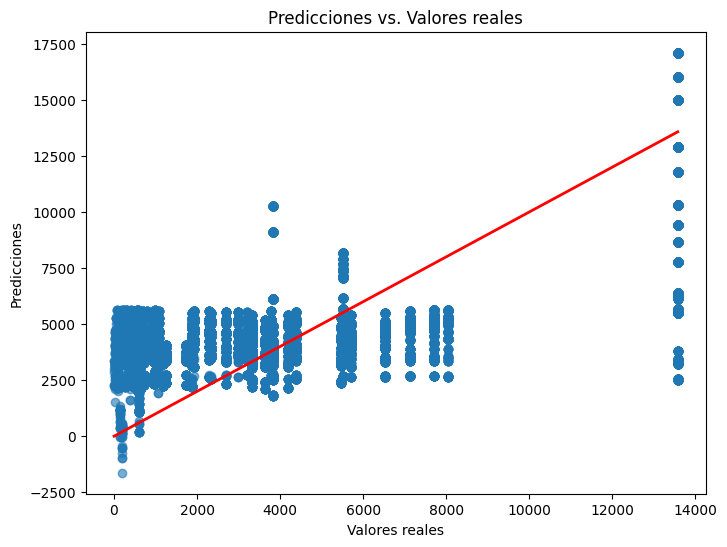

In [141]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores reales')
plt.show()

<br>

<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

## Comparación de modelos.

In [227]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'KNeighbors Regressor': KNeighborsRegressor(n_neighbors=5)
}

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
    mse = -np.mean(scores)
    results[name] = mse
    print(f"{name}: Error cuadrático medio (MSE): {mse:.4f}")

best_model_name = min(results, key=results.get)
print(f"El mejor modelo es {best_model_name} con un MSE de {results[best_model_name]:.4f}")

Linear Regression: Error cuadrático medio (MSE): 8246716.3391
Ridge Regression: Error cuadrático medio (MSE): 8246717.2889
Lasso: Error cuadrático medio (MSE): 8246761.8678
Random Forest: Error cuadrático medio (MSE): 11.5325
Gradient Boosting: Error cuadrático medio (MSE): 52044.2124
XGBoost: Error cuadrático medio (MSE): 38.3418
KNeighbors Regressor: Error cuadrático medio (MSE): 2108.6127
El mejor modelo es Random Forest con un MSE de 11.5325


<br>

Hemos comparado el desempeño de diferentes modelos para predecir la participación total en los Juegos Olímpicos, utilizando el error cuadrático medio (MSE) como métrica de evaluación.

<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

## XGBoost

In [232]:
model_data = final_dataset_cleaned.copy()    #Copiamos el dataset

In [234]:
model_data = pd.read_csv('final_dataset_cleaned.csv')    #Leemos el archivo csv

In [238]:
# Create Participation_Count column
model_data['Participation_Count'] = model_data.groupby('NOC')['NOC'].transform('count')

# Create Participation_Total column
model_data['Participation_Total'] = model_data.groupby('NOC')['Participation_Count'].transform('sum')    #Participación total

In [239]:
print(model_data[['NOC', 'Participation_Total']].head())    #Mostramos el archivo

   NOC  Participation_Total
0  CHN             14714896
1  CHN             14714896
2  DEN              5574321
3  DEN              5574321
4  NED             15499969


In [240]:
features = ['GDP', 'Population', 'Annual Anomaly', 'Monthly Anomaly', 'Participation_Per_Million']
target = 'Participation_Total'

In [242]:
# Create 'Participation_Per_Million' column
model_data['Participation_Per_Million'] = (model_data['Participation_Total'] / model_data['Population']) * 1e6
model_data['Participation_Per_Million'].replace([np.inf, -np.inf], np.nan, inplace=True)
model_data.dropna(subset=['Participation_Per_Million'], inplace=True)

X = model_data[features]    #Características
y = model_data[target]    #Objetivo

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    #Dividimos los datos

In [244]:
scaler = StandardScaler()    #Escalar
X_train_scaled = scaler.fit_transform(X_train)    #Escalar
X_test_scaled = scaler.transform(X_test)    #Escalar

In [245]:
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [246]:
y_pred = xgb_model.predict(X_test_scaled)    #Predecimos

In [247]:
mse = mean_squared_error(y_test, y_pred)    #Error cuadrático medio
r2 = r2_score(y_test, y_pred)    #R2
print(f"MSE en prueba: {mse:.4f}")
print(f"R2 en prueba: {r2:.4f}")

MSE en prueba: 1705856991.1577
R2 en prueba: 1.0000


In [249]:
cv_scores = cross_val_score(xgb_model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
cv_mse = -cv_scores.mean()
print(f"MSE de validación cruzada: {cv_mse:.4f}")

MSE de validación cruzada: 4196148325.2771


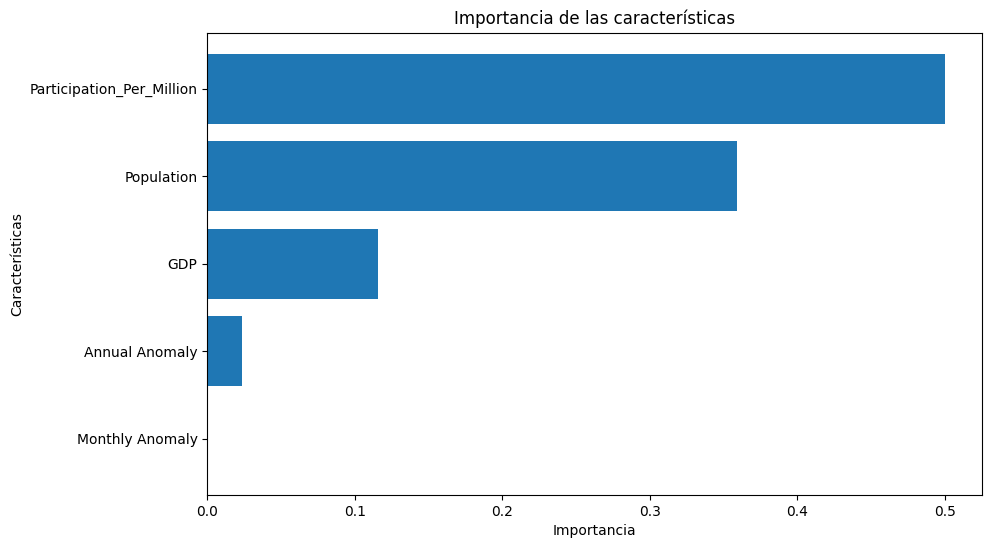

In [250]:
feature_importances = xgb_model.feature_importances_
sorted_indices = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [features[i] for i in sorted_indices])
plt.title('Importancia de las características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

In [251]:
sample_data = pd.DataFrame({
    'GDP': [1.5e12, 2.5e12],
    'Population': [1.5e9, 8e8],
    'Annual Anomaly': [0.5, 0.12],
    'Monthly Anomaly': [0.1, 0.02],
    'Participation_Per_Million': [0.5, 0.3]
})
sample_data_scaled = scaler.transform(sample_data)    #Escalar
predictions = xgb_model.predict(sample_data_scaled)    #Predecimos
sample_data['Predicted_Participation'] = predictions    #Agregamos la columna
print(sample_data)

            GDP    Population  Annual Anomaly  Monthly Anomaly  \
0  1.500000e+12  1.500000e+09            0.50             0.10   
1  2.500000e+12  8.000000e+08            0.12             0.02   

   Participation_Per_Million  Predicted_Participation  
0                        0.5               1979016.25  
1                        0.3              14162409.00  


In [252]:
joblib.dump(xgb_model, 'xgboost_model.pkl')    #Guardamos el modelo
joblib.dump(scaler, 'scaler.pkl')    #Guardamos el escalador

['scaler.pkl']

<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

## Predicción del rendimiento de países en los próximos Juegos Olímpicos.

In [253]:
prediction_data = pd.DataFrame({
        'GDP': [1.5e12, 2.5e12],
        'Population': [1.5e9, 8e8],
        'Annual Anomaly': [0.5, 0.12],
        'Monthly Anomaly': [0.1, 0.02],
        'Participation_Per_Million': [0.5, 0.3]
})
prediction_data_scaled = scaler.transform(prediction_data)    #Escalar
predicted_participation = xgb_model.predict(prediction_data_scaled)    #Predecimos
prediction_data['Predicted_Participation'] = predicted_participation    #Agregamos la columna
print("Resultados de la predicción:")
print(prediction_data)


Resultados de la predicción:
            GDP    Population  Annual Anomaly  Monthly Anomaly  \
0  1.500000e+12  1.500000e+09            0.50             0.10   
1  2.500000e+12  8.000000e+08            0.12             0.02   

   Participation_Per_Million  Predicted_Participation  
0                        0.5               1979016.25  
1                        0.3              14162409.00  


<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

## Predicción por Regiones

In [254]:
grouped_data = model_data.groupby('Region')[features].mean()
grouped_data['Predicted_Partocipation'] = grouped_data.apply(
    lambda row: xgb_model.predict(scaler.transform(row.values.reshape(1, -1)))[0], axis=1
)
print("Predicciones por región:")
print(grouped_data['Predicted_Partocipation'])

Predicciones por región:
Region
East Asia & Pacific           1.688900e+08
Europe & Central Asia         5.131260e+07
Latin America & Caribbean     9.963764e+06
Middle East & North Africa    5.199476e+05
North America                 9.333994e+07
South Asia                    1.455592e+07
Sub-Saharan Africa            1.157092e+05
Name: Predicted_Partocipation, dtype: float32


In [257]:
fig = px.bar(
    grouped_data.reset_index(),
    x='Region',
    y='Predicted_Partocipation',
    title='Predicciones de participación por región',
    labels={'Predicted_Partocipation': 'Participación predicha', 'index': 'Región'},
    template='plotly_white',
    color='Region',
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig.update_layout(
    title=dict(font=dict(size=20, color='black', family='Arial', weight='bold'), x=0.5),
    xaxis=dict(title='Región', tickangle=45, titlefont=dict(size=14, color='black'), tickfont=dict(color='black')),
    yaxis=dict(title='Participación predicha', titlefont=dict(size=14, color='black'), tickfont=dict(color='black')),
    plot_bgcolor='white',
    paper_bgcolor='white'
)
fig.show()

<br>

<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

## Evaluación hipotética para los próximos Juegos Olímpicos.

In [261]:
simulation_data = prediction_data.copy()
simulation_data['GDP'] = simulation_data['GDP'] * 1.2
simulation_data = simulation_data.drop(columns=['Predicted_Participation'])
simulation_scaled = scaler.transform(simulation_data)
simulation_data['Predicted_Participation'] = xgb_model.predict(simulation_scaled)
print("Resultados de simulación (Aumento del PIB)")
print(simulation_data)

Resultados de simulación (Aumento del PIB)
            GDP    Population  Annual Anomaly  Monthly Anomaly  \
0  1.800000e+12  1.500000e+09            0.50             0.10   
1  3.000000e+12  8.000000e+08            0.12             0.02   

   Participation_Per_Million  Predicted_Participation  
0                        0.5             1.977614e+06  
1                        0.3             1.390386e+07  


<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

## Participación predicha vs PIB

In [282]:
import plotly.express as px

# Crear un rango de PIBs simulados con mayor granularidad
gdp_values = np.linspace(1.5e12, 3.0e12, 50)  # 50 valores entre 1.5 y 3 trillones
sensitivity_data = []

for gdp in gdp_values:
    temp_data = prediction_data.copy()
    temp_data['GDP'] = gdp
    temp_data = temp_data.drop(columns=['Predicted_Participation'], errors='ignore')
    temp_scaled = scaler.transform(temp_data)
    pred = round(xgb_model.predict(temp_scaled)[0], 2)
    sensitivity_data.append({'GDP': gdp, 'Predicted_Participation': pred})

# Convertir resultados en un DataFrame
sensitivity_df = pd.DataFrame(sensitivity_data)

# Graficar con un rango más amplio y puntos representativos
fig = px.line(
    sensitivity_df,
    x='GDP',
    y='Predicted_Participation',
    title='Impacto del PIB en la Participación Olímpica Predicha',
    labels={'GDP': 'PIB (GDP)', 'Predicted_Participation': 'Participación Predicha'},
    template='plotly_white',
    markers=True
)

fig.update_traces(marker=dict(size=8, symbol='circle', color='blue', line=dict(width=2, color='DarkSlateGrey')))
fig.update_layout(
    title=dict(font=dict(size=20, color='black', family='Arial', weight='bold'), x=0.5),
    xaxis=dict(title='PIB (GDP)', titlefont=dict(size=16, color='black'), tickfont=dict(color='black')),
    yaxis=dict(title='Participación Predicha', titlefont=dict(size=16, color='black'), tickfont=dict(color='black')),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.show()


Este gráfico muestra cómo la participación predicha en los Juegos Olímpicos varía en función del PIB de los países simulados. Se observa una tendencia relativamente estable en los niveles intermedios de PIB, con ligeras fluctuaciones, mientras que niveles extremos presentan caídas abruptas o estabilidad plana. Esto podría deberse a la influencia de otras variables que moderan el efecto del PIB en el modelo, como la población y la participación por millón de habitantes. Este análisis permite explorar escenarios futuros para países con diferentes niveles de desarrollo económico.

<br>

<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

## Sensibilidad de la participación predicha a cambios en la población.

In [286]:
import plotly.express as px

population_values = np.linspace(5e7, 2e9, 50)  # 50 valores entre 50M y 2B
sensitivity_population = []
for pop in population_values:
    temp_data = prediction_data.copy()
    temp_data['Population'] = pop
    temp_data = temp_data.drop(columns=['Predicted_Participation'], errors='ignore')
    temp_scaled = scaler.transform(temp_data)
    pred = xgb_model.predict(temp_scaled)[0]
    sensitivity_population.append({'Population': pop, 'Predicted_Participation': pred})

sensitivity_population_df = pd.DataFrame(sensitivity_population)

fig = px.line(
    sensitivity_population_df,
    x='Population',
    y='Predicted_Participation',
    title='Impacto de la población en la participación olímpica predicha',
    labels={'Population': 'Población', 'Predicted_Participation': 'Participación predicha'},
    template='plotly_white',
    markers=True,
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_traces(marker=dict(size=8, symbol='circle', line=dict(width=2, color='DarkSlateGrey')))
fig.update_layout(
    title=dict(font=dict(size=20, color='black', family='Arial', weight='bold'), x=0.5),
    xaxis=dict(title='Población', titlefont=dict(size=16, color='black'), tickfont=dict(color='black')),
    yaxis=dict(title='Participación predicha', titlefont=dict(size=16, color='black'), tickfont=dict(color='black')),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.show()


Este análisis evalúa cómo cambios en la población afectan la participación predicha, manteniendo constantes otras variables como el PIB y las anomalías climáticas. Se observa que, en general, mayores niveles de población incrementan la participación predicha, aunque pueden presentarse puntos de saturación donde otros factores influyen más en las predicciones.

<br>

<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

## Sensibilidad a las anomalías climáticas (anual)

In [289]:
import plotly.express as px

annual_anomaly_values = np.linspace(-1, 1, 50)  # 50 valores entre -1 y 1
sensitivity_anomaly = []
for anomaly in annual_anomaly_values:
    temp_data = prediction_data.copy()
    temp_data['Annual Anomaly'] = anomaly
    temp_data = temp_data.drop(columns=['Predicted_Participation'], errors='ignore')
    temp_scaled = scaler.transform(temp_data)
    pred = xgb_model.predict(temp_scaled)[0]
    sensitivity_anomaly.append({'Annual Anomaly': anomaly, 'Predicted_Participation': pred})

sensitivity_anomaly_df = pd.DataFrame(sensitivity_anomaly)

fig = px.line(
    sensitivity_anomaly_df,
    x='Annual Anomaly',
    y='Predicted_Participation',
    title='Impacto de la anomalía anual en la participación olímpica predicha',
    labels={'Annual Anomaly': 'Anomalía climática anual', 'Predicted_Participation': 'Participación predicha'},
    template='plotly_white',
    markers=True,
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_traces(marker=dict(size=8, symbol='circle', line=dict(width=2, color='DarkSlateGrey')))
fig.update_layout(
    title=dict(font=dict(size=20, color='black', family='Arial', weight='bold'), x=0.5),
    xaxis=dict(title='Anomalía climática anual', titlefont=dict(size=16, color='black'), tickfont=dict(color='black')),
    yaxis=dict(title='Participación predicha', titlefont=dict(size=16, color='black'), tickfont=dict(color='black')),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.show()

Este gráfico evalúa cómo las anomalías climáticas anuales afectan la participación predicha en los Juegos Olímpicos. Las anomalías climáticas, representando condiciones extremas, podrían impactar tanto la preparación como la participación de los países. Se observa que, dentro de ciertos rangos, las anomalías tienen un efecto moderado en la predicción, mientras que valores más extremos podrían generar cambios más significativos. Este análisis ayuda a entender cómo eventos climáticos globales podrían influir en la dinámica de participación olímpica.

<hr style="margin-bottom: 40px;">

## API Key del modelo en Azure

http://5c808c2b-5d42-42b8-9c4c-6ab471406c2e.spaincentral.azurecontainer.io/score


API Key: VISIGn8xPJmpXWSM7dHpqRfIOsasPI1z

<hr style="margin-bottom: 40px;">

## Exploración y predicción de tendencias olímpicas: un enfoque temporal.

In [304]:
df = pd.read_csv('final_dataset_cleaned.csv')    #Leemos el archivo csv
df_medals = df[df['Medal'] != 'No Medal']    #Filtramos las medallas
df_series_medals = df_medals.groupby('Year').size().reset_index(name='Total Medals')    #Agrupamos por año
print(df_series_medals.head())

   Year  Total Medals
0  1896            91
1  1900           413
2  1904           339
3  1906           274
4  1908           655


In [323]:
import plotly.express as px

fig = px.line(
    df_series_medals.reset_index(),
    x='Year',
    y='Total Medals',
    title='Evolución del número total de medallas por año',
    labels={'Year': 'Año', 'Total Medals': 'Número total de medallas'},
    template='plotly_white',
    markers=True,
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_traces(marker=dict(size=8, symbol='circle', line=dict(width=2, color='DarkSlateGrey')))
fig.update_layout(
    title=dict(font=dict(size=18, color='navy', family='Arial', weight='bold'), x=0.5),
    xaxis=dict(title='Año', titlefont=dict(size=14, color='black'), tickfont=dict(color='black')),
    yaxis=dict(title='Número total de medallas', titlefont=dict(size=14, color='black'), tickfont=dict(color='black')),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.show()

En este gráfico podemos observar la evolución histórica del número total de medallas otorgadas en los Juegos Olímpicos a lo largo del tiempo. S e observa un crecimiento sostenido desde el inicio de las Olimpiadas modernas en 1896, con un notable incremento a partir de mediados del siglo XX. 

Como observamos en los datos a partir del año 2000, se presentan algunas oscilaciones notables. Estas pueden atribuirse a inconsistencias en las fuentes originales o a la complejidad de consolidar datos históricos. Este hecho nos recuerda la importancia de trabajar con datos de alta calidad y nos desafía a realizar análisis con las herramientas disponibles.

In [4]:
import pandas as pd
import pickle
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_csv('final_dataset_cleaned.csv')    #Leemos el archivo csv
df_medals = df[df['Medal'] != 'No Medal']    #Filtramos las medallas
df_series_medals = df_medals.groupby('Year').size().reset_index(name='Total Medals')    #Agrupamos por año

model = ARIMA(df_series_medals['Total Medals'], order=(1, 1, 1))    #Modelo ARIMA
model_fit = model.fit()    #Ajustamos el modelo
with open('arima_model.pkl', 'wb') as file:    #Guardamos el modelo
    pickle.dump(model_fit, file)
print("Modelo ARIMA guardado exitosamente")
print(model_fit.summary())    #Resumen

Modelo ARIMA guardado exitosamente
                               SARIMAX Results                                
Dep. Variable:           Total Medals   No. Observations:                   35
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -243.015
Date:                Fri, 22 Nov 2024   AIC                            492.030
Time:                        18:21:01   BIC                            496.609
Sample:                             0   HQIC                           493.591
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9686      0.137     -7.086      0.000      -1.237      -0.701
ma.L1          0.1108      0.421      0.263      0.792      -0.714       0.935
sigma2      9.278

Se utilizó un modelo ARIMA(1,1,1) para predecir el número total de medallas por año. El coeficiente AR(1)(-0.9686) es significativo (P<0.001) y explica la dependencia entre años consecutivos tras la diferenciación. El componente MA(1) no fue significativo, indicando poca contribución al modelo. La prueba de Ljung-Box (P = 0.81) sugiere que los residuos no tienen correlación aunque la prueba de Jarque-Bera(P=0.00) muestra que no son normales, y se detectó heterocedasticidad (P=0.01). 

In [326]:
forecast = model_fit.forecast(steps=5)    #Pronóstico
print("Predicciones futuras de medallas:")
print(forecast)

Predicciones futuras de medallas:
35     600.112600
36    1900.858324
37     640.931812
38    1861.320075
39     679.229295
Name: predicted_mean, dtype: float64


El modelo ARIMA(1, 1, 1) se utilizó para predecir el número de medallas que se otorgarán en los próximos eventos olímpicos. Las predicciones muestran un patrón alternante entre valores altos y bajos, reflejando la diferencia histórica en el número de medallas otorgadas en los JJOO de verano y los de invierno.

**Resultados predichos**:
- **Año 1**: 600 medallas (probablemente un evento de invierno).
- **Año 2**: 1900 medallas (probablemente un evento de verano).
- **Año 3**: 640 medallas (evento invierno).
- **Año 4**: 1861 medallas (evento de verano).
- **Año 5**: 679 medallas (evento invierno).

Estas predicciones deben interpretarse como estimaciones basadas en datos históricos. 

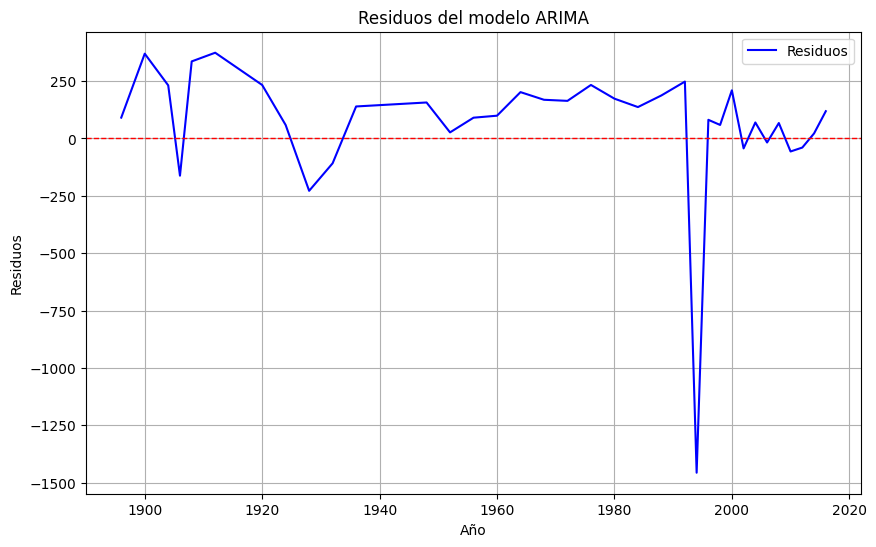

In [338]:
residuals = model_fit.resid    #Residuos
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuos', color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('Residuos del modelo ARIMA')
plt.xlabel('Año')
plt.ylabel('Residuos')
plt.legend()
plt.grid()
plt.show()

El gráfico de los residuos indica que, en general, las predicciones del modelo ARIMA se ajustan bien a los datos históricos, ya que oscilan cerca de cero. Las variaciones observadas reflejan la dinámica de eventos únicos en determinados periodos, especialmente en el año 2000, cuando puede ser notable la diferencia de medallas entre los JJOO de Verano y los de Invierno.

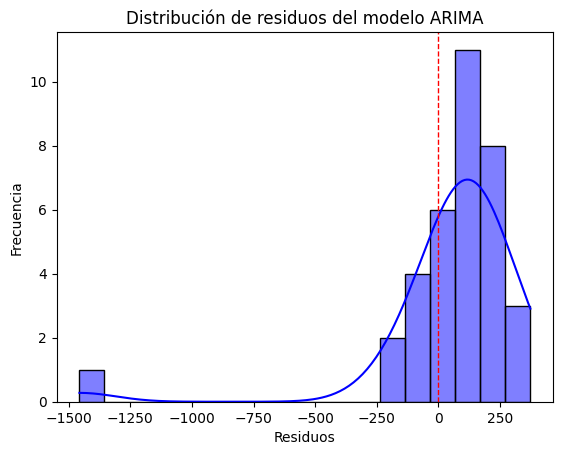

In [339]:
sns.histplot(residuals, kde=True, color='blue')    #Histograma
plt.title('Distribución de residuos del modelo ARIMA')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.show()

In [346]:
import plotly.graph_objects as go

# Filtrar por verano e invierno
df_verano = df[df['Season'] == 'Summer'].groupby('Year')['Medal'].count()
df_invierno = df[df['Season'] == 'Winter'].groupby('Year')['Medal'].count()

# Crear la figura
fig = go.Figure()

# Añadir la línea de verano
fig.add_trace(go.Scatter(
    x=df_verano.index,
    y=df_verano.values,
    mode='lines+markers',
    name='JJOO Verano',
    line=dict(color='orange'),
    marker=dict(size=8)
))

# Añadir la línea de invierno
fig.add_trace(go.Scatter(
    x=df_invierno.index,
    y=df_invierno.values,
    mode='lines+markers',
    name='JJOO Invierno',
    line=dict(color='blue'),
    marker=dict(size=8)
))

# Configurar el layout
fig.update_layout(
    title='Comparación de medallas: Verano vs Invierno',
    xaxis_title='Año',
    yaxis_title='Número de medallas',
    legend_title='Temporada',
    template='plotly_white'
)

# Mostrar la figura
fig.show()

El gráfico muestra la evolución del número total de medallas otorgadas en ls Juegos Olímpicos de Verano e Invierno a lo largo del tiempo. Es evidente que los JJOO de Verano han generado históricamente un mayor número de medallas, reflejando su mayor participación y variedad de deportes. Por otro lado, los JJOO de Invierno han tenido un crecimiento constante pero más moderado, alineado con su naturaleza más especializada. La diferencia en las tendencias subraya la escala global y la diversidad de ambos eventos.

In [352]:
import plotly.express as px

df_region = df.groupby(['Year', 'Region'])['Medal'].count().unstack()   # Agrupamos por año y región
fig = px.line(df_region, 
              title='Evolución de medallas por región', 
              labels={'value': 'Número de medallas', 'Year': 'Año'},
              template='plotly_white')

# Añadir marcadores y ajustar el grosor de la línea
for trace in fig.data:
    trace.update(mode='lines+markers', line=dict(width=3))

fig.update_layout(
    title=dict(font=dict(size=16)),
    xaxis=dict(title='Año', titlefont=dict(size=12), tickfont=dict(size=10)),
    yaxis=dict(title='Número de medallas', titlefont=dict(size=12), tickfont=dict(size=10)),
    legend=dict(title='Región', title_font=dict(size=12), font=dict(size=10)),
    xaxis_tickangle=45
)

fig.show()

El gráfico muestra cómo la distribución de medallas ha evolucionado en diferentes regiones a lo largo del tiempo. Europa y Asia central destacan consistentemente como las regiones con el mayor número de medallas, reflejando su histórica participación en los JJOO. Por otro lado, regiones como América Latina y África Subsahariana presentan una menor representación, lo que evidencia desigualdades históricas en acceso y participación. Las fluctuaciones evidentes a partir del año 2000 podrían estar relacionadas con la alternancia de los JJOO de verano e invierno, que influyen en la cantidad de medallas distribuidas cada año.

<hr style="margin-bottom: 40px;">

<div style="text-align:center; font-weight:bold; font-size: 24px;">
Buscador de imágenes reales.
</div>

In [ ]:
import requests
from IPython.display import Image, display

# Clave API y punto de conexión
subscription_key = ""  # Reemplaza con tu clave API de Bing
endpoint = ""

# Función para buscar imágenes y mostrarlas
def buscar_imagen_bing(query):
    headers = {"Ocp-Apim-Subscription-Key": subscription_key}
    params = {"q": query, "count": 1}  # Buscar solo 1 imagen
    response = requests.get(endpoint, headers=headers, params=params)
    
    if response.status_code == 200:
        resultado = response.json()
        if resultado["value"]:
            image_url = resultado['value'][0]['contentUrl']
            print(f"Imagen encontrada: {image_url}")
            display(Image(url=image_url))  # Mostrar la imagen en el notebook
        else:
            print("No se encontraron imágenes para esa búsqueda.")
    else:
        print(f"Error: {response.status_code}")

# Ejemplo de uso
consulta = ""
buscar_imagen_bing(consulta)

<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

<div style="text-align:center; font-weight:bold; font-size: 24px;">
Generación de imágenes del proyecto con AI.
</div>

In [ ]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Reemplaza esto con tu clave API y tu URL
api_key = ''
endpoint = ''

# Prompt de texto que quieres convertir en imagen
prompt = ""

# Encabezados necesarios para hacer la petición
headers = {
    'Content-Type': 'application/json',
    'api-key': api_key,
}

# Cuerpo de la solicitud
data = {
    "prompt": prompt,
    "n": 1,
    "size": "1024x1024"
}

# Realiza la solicitud a la API
response = requests.post(endpoint, json=data, headers=headers)

# Verifica si la solicitud fue exitosa
if response.status_code == 200:
    response_data = response.json()
    # Obtén la URL de la imagen generada
    image_url = response_data['data'][0]['url']
    
    # Descargar la imagen desde la URL
    image_response = requests.get(image_url)
    
    # Mostrar la imagen en el notebook
    img = Image.open(BytesIO(image_response.content))
    plt.imshow(img)
    plt.axis('off')  # Ocultar los ejes
    plt.show()
else:
    print(f"Error: {response.status_code}")
    print(response.json())
